In [1]:
import cPickle as cp
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = cp.load(open('winequality-white.cPickle','rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]


#sample std dev
stdDevY = np.std(y, ddof=1)
y_train_mean = y_train.mean()

print 'There are ', N, ' total datapoints and ', D, 'dimensions in the full data set'
print 'There are ', N_train, ' training datapoints'
print 'There are ', N_test, ' test datapoints'

def computeMSE(arr, mean):
	total = 0
	numInputs = len(arr)
	for currentValue in arr:
		total += (currentValue - mean) ** 2
	return total / numInputs
	

def computeMSE2(hatArr, origArr):
	total = 0
	numInputs = len(hatArr)
	for i in range (0, numInputs):
		total += (hatArr[i] - origArr[i]) ** 2
	return total / numInputs


There are  4898  total datapoints and  11 dimensions in the full data set
There are  3918  training datapoints
There are  980  test datapoints


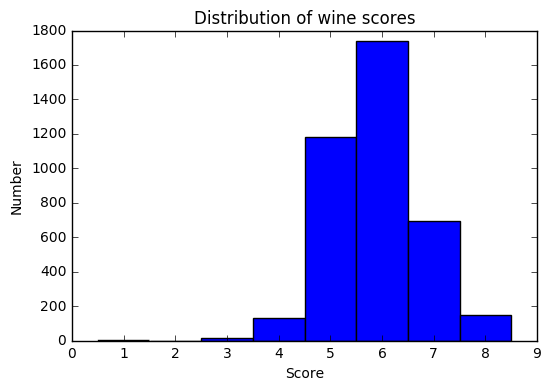

In [2]:
bins=np.arange(1,10,1)

plt.hist(y_train ,  align='left', bins=bins)
plt.xlabel('Score')
plt.ylabel('Number')
plt.title('Distribution of wine scores')

#plt.set_xticks(bins[:-1])

plt.show()

In [3]:
y_train_MSE = computeMSE(y_train, y_train_mean)
print '\nThe MSE for the training data is: ', y_train_MSE

y_test_MSE = computeMSE(y_test, y_train_mean)
print 'The MSE for the test data is: ', y_test_MSE


The MSE for the training data is:  0.795421570996
The MSE for the test data is:  0.739404610626


In [4]:
## Standardise the data ## 

# axis=0 - normalises each column
X_train_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# standardise text data as well 
X_test_std = (X_test - np.mean(X_train, axis=0)) / np.std(X_test, axis=0)

# Add bias column to standardised X_train
X_train_std = np.c_[np.ones(N_train), X_train]
X_test_std = np.c_[np.ones(N_test), X_test]

In [5]:
# Compute weights

# w is a (D + 1) x 1 matrix
# w = (Xt X)^-1 Xt y
#inverse_X_train = np.linalg.inv(X_train)
XtX = (X_train_std.T).dot(X_train_std)
XtX_inverse = np.linalg.inv(XtX)
XtX_inverse_Xt = XtX_inverse.dot(X_train_std.T)

w = XtX_inverse_Xt.dot(y_train)
#print w

In [6]:

# now we can apply the model
# y_hat = X.w

y_train_hat = X_train_std.dot(w)

y_train_hat_MSE = computeMSE2(y_train_hat, y_train)
print '\nThe MSE using the linear model for the training data is: ', y_train_hat_MSE

y_test_hat = X_test_std.dot(w)

y_test_hat_MSE = computeMSE2(y_test_hat, y_test)
print 'The MSE using the linear model for the test data is: ', y_test_hat_MSE


The MSE using the linear model for the training data is:  0.565591862974
The MSE using the linear model for the test data is:  0.555029478457


In [7]:
# LEARNING CURVES
#plot1, = plt.plot([], [])
xData = []
yTrainData = []
yTestData = []

# clear the current plot data
plt.clf()

for n in xrange(20, 600, 20):
	N, D = X.shape
	N_train = n
	N_test = N - N_train

	X_train = X[:N_train]
	y_train = y[:N_train]
	X_test = X[N_train:]
	y_test = y[N_train:]


	#sample std dev
	stdDevY = np.std(y, ddof=1)
	y_train_mean = y_train.mean()

	## Standardise the data ## 

	# axis=0 - normalises each column
	X_train_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
	#print np.mean(X_train, axis = 0)
	#print np.mean(X_train_std, axis = 0)

	# standardise text data as well 
	X_test_std = (X_test - np.mean(X_train, axis=0)) / np.std(X_test, axis=0)

	# Add bias column to standardised X_train
	X_train_std = np.c_[np.ones(N_train), X_train]
	X_test_std = np.c_[np.ones(N_test), X_test]
	#print X_train[1]

	# Compute weights

	# w is a (D + 1) x 1 matrix
	# w = (Xt X)^-1 Xt y
	#inverse_X_train = np.linalg.inv(X_train)
	XtX = (X_train_std.T).dot(X_train_std)
	XtX_inverse = np.linalg.inv(XtX)
	XtX_inverse_Xt = XtX_inverse.dot(X_train_std.T)

	w = XtX_inverse_Xt.dot(y_train)
	#print w

	# now we can apply the model
	# y_hat = X.w

	y_train_hat = X_train_std.dot(w)

	y_train_hat_MSE = computeMSE2(y_train_hat, y_train)
	#print '\nThe MSE using the linear model for the training data is: ', y_train_hat_MSE

	y_test_hat = X_test_std.dot(w)

	y_test_hat_MSE = computeMSE2(y_test_hat, y_test)
	#print 'The MSE using the linear model for the test data is: ', y_test_hat_MSE
	
	xData.append(n)
	yTrainData.append(y_train_hat_MSE)
	yTestData.append(y_test_hat_MSE)
	#plot1.set_xdata(np.append(plot1.get_xdata(), n))
	#plot1.set_ydata(np.append(plot1.get_ydata(), y_train_hat_MSE))

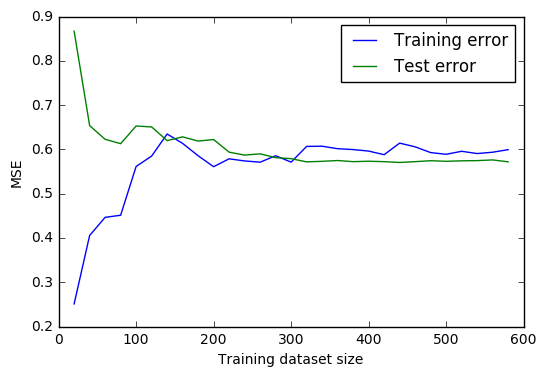

In [8]:
plt.plot(xData, yTrainData, 'b-', label='Training error')
plt.plot(xData, yTestData, 'g-', label='Test error')
plt.xlabel('Training dataset size')
plt.ylabel('MSE')
plt.legend()

plt.show()

If the model has a high bias (or suitable bias), then we can expect the training error and test error curves to approach each other and then stay fairly level. High variance, on the other hand, would be indicated by an increase in the training error and decrease in the test error as we increase the training input, with them only approaching each other as the training data size gets much higher.

The curves above appear to indicate that the model is either underfitting, or fitting correctly.

In [9]:
# Set last 20% of training set for validation 

N, D = X.shape
N_train = int(0.6 * N)
N_start_test = int(0.8 * N) # i.e. end of validation set

N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]

X_test = X[N_start_test:]
y_test = y[N_start_test:]

X_validation = X[N_train:N_start_test]
y_validation = y[N_train:N_start_test]

In [10]:
min_MSE = 100000
optimal_lambda = 10**-5
optimal_degree = 2

for i in range(-5, 6):
    # now iterate through degrees
    for d in range(2,5):
        poly = PolynomialFeatures(d)
        X_train_transformed = poly.fit_transform(X_train)
        
        # scale data
        scaler = StandardScaler().fit(X_train_transformed)        
        X_train_transformed = scaler.transform(X_train_transformed)
        
        l = 10 ** i

        clf = Ridge(alpha=l, fit_intercept=True)
        clf.fit(X_train_transformed, y_train)

        # Use the validation set to test this value of lambda and degree
        X_validation_transformed = poly.fit_transform(X_validation)
        # apply scaling
        X_validation_transformed = scaler.transform(X_validation_transformed)

        y_pred = clf.predict(X_validation_transformed)

        ridge_MSE = computeMSE2(y_pred, y_validation)
        if ridge_MSE < min_MSE:
            #print 'new optimal:', l , d
            min_MSE = min(min_MSE, ridge_MSE)
            optimal_lambda_ridge = l
            optimal_lambda_power = i # for printing
            optimal_degree_ridge = d
        
        print ridge_MSE
    print ''

print 'Optimal lambda for Ridge Regression is: 10 ^',optimal_lambda_power 
print 'Optimal degree for Ridge Regression is:', optimal_degree_ridge

0.521545990804
0.6759529736
66.9190959557

0.519678375605
0.66159399102
70.8125661339

0.518644025163
0.646966032822
45.9384766071

0.522520196001
0.610252407726
14.9355872056

0.52626257416
0.542197622042
2.39521197477

0.524051340568
0.53161923854
0.535295989696

0.52354694798
0.4968901792
0.533323754214

0.527377415244
0.505323134311
0.498946457491

0.543679970651
0.529627095355
0.511733465291

0.596278867716
0.554054211254
0.538049472743

0.720098905625
0.652817685448
0.59491550643

Optimal lambda for Ridge Regression is: 10 ^ 1
Optimal degree for Ridge Regression is: 3


In [11]:
min_MSE = 100000
optimal_lambda = 10**-5
optimal_degree = 2

for i in range(-5, 6):
    # now iterate through degrees
    for d in range(2,5):
        poly = PolynomialFeatures(d)
        X_train_transformed = poly.fit_transform(X_train)
        
        # scale data
        scaler = StandardScaler().fit(X_train_transformed)        
        X_train_transformed = scaler.transform(X_train_transformed)
        
        l = 10 ** i

        clf = Lasso(alpha=l, fit_intercept=True)
        clf.fit(X_train_transformed, y_train)

        # Use the validation set to test this value of lambda and degree
        X_validation_transformed = poly.fit_transform(X_validation)
        # apply scaling
        X_validation_transformed = scaler.transform(X_validation_transformed)
        
        y_pred = clf.predict(X_validation_transformed)

        lasso_MSE = computeMSE2(y_pred, y_validation)
        if lasso_MSE < min_MSE:
            #print 'new optimal:', l , d
            min_MSE = min(min_MSE, lasso_MSE)
            optimal_lambda_lasso = l
            optimal_lambda_power = i # for printing
            optimal_degree_lasso = d
        
        print lasso_MSE
    print ''

print 'Optimal lambda for lasso is: 10 ^',optimal_lambda_power 
print 'Optimal degree for lasso is:', optimal_degree_lasso

/usr/local/Anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.524119604235
0.681251666447
0.517086839666

0.522545009028
0.633459379769
0.518070620853

0.520974095094
0.498077250854
0.513055428909

0.537638621357
0.531531285828
0.531072139065

0.594776615802
0.590679885383
0.584849852045

0.791155620741
0.791155620741
0.791155620741

0.791155620741
0.791155620741
0.791155620741

0.791155620741
0.791155620741
0.791155620741

0.791155620741
0.791155620741
0.791155620741

0.791155620741
0.791155620741
0.791155620741

0.791155620741
0.791155620741
0.791155620741

Optimal lambda for lasso is: 10 ^ -3
Optimal degree for lasso is: 3


In [12]:
# Now train on full test set using optimal values

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# RIDGE REGRESSION
poly = PolynomialFeatures(optimal_degree_ridge)
X_train_transformed = poly.fit_transform(X_train)

# scale data
scaler = StandardScaler().fit(X_train_transformed)        
X_train_transformed = scaler.transform(X_train_transformed)
        
clf = Ridge(alpha=optimal_lambda_ridge, fit_intercept=True)
clf.fit(X_train_transformed, y_train)

# Use the test and training set to compute the test and training error
X_test_transformed = poly.fit_transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

y_pred_test = clf.predict(X_test_transformed)
test_error = computeMSE2(y_pred_test, y_test)

print "Using lambda =", optimal_lambda_ridge, "and degree =", optimal_degree_ridge

print "The test error for Ridge Regression is:", test_error

X_train_transformed = poly.fit_transform(X_train)
X_train_transformed = scaler.transform(X_train_transformed)

y_pred_train = clf.predict(X_train_transformed)
train_error = computeMSE2(y_pred_train, y_train)

print "The training error for Ridge Regression is:", train_error


# LASSO

poly = PolynomialFeatures(optimal_degree_lasso)
X_train_transformed = poly.fit_transform(X_train)

# scale data
scaler = StandardScaler().fit(X_train_transformed)        
X_train_transformed = scaler.transform(X_train_transformed)
        
clf = Lasso(alpha=optimal_lambda_lasso, fit_intercept=True)
clf.fit(X_train_transformed, y_train)

# Use the test and training set to compute the test and training error
X_test_transformed = poly.fit_transform(X_test)
X_test_transformed = scaler.transform(X_test_transformed)

y_pred_test = clf.predict(X_test_transformed)
test_error = computeMSE2(y_pred_test, y_test)

print "\nUsing lambda =", optimal_lambda_lasso, "and degree =", optimal_degree_lasso

print "The test error for Lasso is:", test_error

X_train_transformed = poly.fit_transform(X_train)
X_train_transformed = scaler.transform(X_train_transformed)

y_pred_train = clf.predict(X_train_transformed)
train_error = computeMSE2(y_pred_train, y_train)

print "The training error for Lasso is:", train_error

Using lambda = 10 and degree = 3
The test error for Ridge Regression is: 0.494671496439
The training error for Ridge Regression is: 0.47492907728

Using lambda = 0.001 and degree = 3
The test error for Lasso is: 0.493508339884
The training error for Lasso is: 0.486286922675
